In [ ]:
import numpy as np

In [ ]:
import kagglehub
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.


In [ ]:
import pandas as pd
df = pd.read_csv(f'{path}/Salary_dataset.csv')

In [ ]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## train test split

In [ ]:
X = df['YearsExperience']
y = df['Salary']

In [ ]:
train_ratio = 0.8
train_size = int(train_ratio * len(X))


In [ ]:
train_size

24

In [ ]:

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
X.size,X_train.size,X_test.size

(30, 24, 6)

## Linear Regression

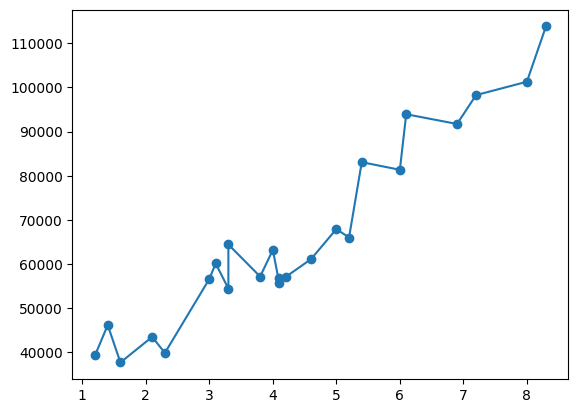

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train,y_train)
plt.scatter(X_train,y_train)

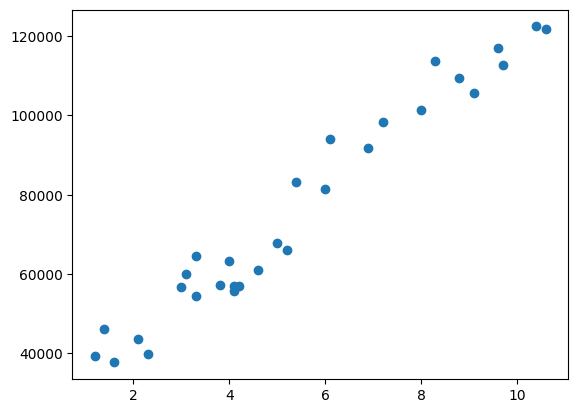

In [ ]:
plt.scatter(X,y)

## Standardization

In [ ]:
class StandardScaler():
  def __init__(self):
    self.mean_ = None
    self.std_ = None

  def fit(self,x):
    x = np.array(x)
    self.mean_ = x.mean()
    self.std_ = x.std()
    return self

  def transform(self,x):
    x = np.array(x)
    return (x - self.mean_)/ self.std_


In [ ]:
X_train.head(5)

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([-1.59375625, -1.49229696, -1.39083768, -1.13718947, -1.03573019,
        -0.68062269, -0.62989305, -0.52843377, -0.52843377, -0.27478556,
        -0.17332628, -0.12259663, -0.12259663, -0.07186699,  0.13105157,
         0.33397014,  0.43542943,  0.53688871,  0.84126656,  0.8919962 ,
         1.29783334,  1.45002226,  1.8558594 ,  2.00804832]),
 array([2.26169653, 2.41388546, 2.66753367, 2.71826331, 3.0733708 ,
        3.17483008]))

In [ ]:
y_train_scaled = scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

## Linear Regression Model

In [ ]:
class LinearRegression():
  def __init__(self,lr=0.01,max_iter=10000,threshold=1e-6):
    self.lr = lr
    self.max_iter = max_iter
    self.threshold = threshold
    self.w = 0
    self.b = 0

  def fit(self,x,y):
    x,y = np.array(x),np.array(y)
    m = len(x)
    loss_history=[]
    y_pred = self.w * x + self.b
    errors = y_pred - y
    prev_loss = ((1/2*m) * np.sum(errors**2))
    for i in range(self.max_iter):
      w_grad = (1/m) * np.sum(errors * x) # negative sign in x and 1 in wk+1 and bk+1 are multiplied with the negative sign at the (w1- alpha * grad_w) to give (w1 + alpha * grad_w)
      b_grad = (1/m) * np.sum(errors)
      self.w += self.lr * w_grad
      self.b += self.lr * b_grad
      y_pred = self.w * x + self.b
      errors = y-y_pred
      curr_loss = ((1/2*m)) * np.sum(errors**2)
      if np.abs(curr_loss - prev_loss) < self.threshold:
        break
      loss_history.append(curr_loss)
    return loss_history

  def predict(self,x):
    x = np.array(x)
    return self.w * x + self.b

  def plot(self,x,y):
    y_pred = self.predict(x)
    plt.plot(x,y_pred)
    plt.plot(x,y)

In [ ]:
model = LinearRegression()
loss_history=model.fit(X_train_scaled,y_train_scaled)

In [ ]:
len(loss_history)

10000

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

array([ 8.43109549,  8.7185192 ,  9.19755872,  9.29336662,  9.96402195,
       10.15563775])

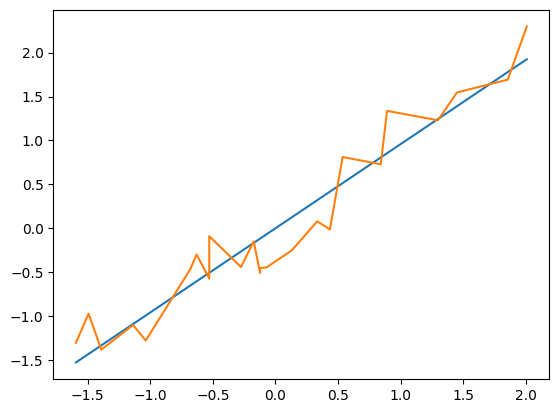

In [ ]:
model.plot(X_train_scaled,y_train_scaled)

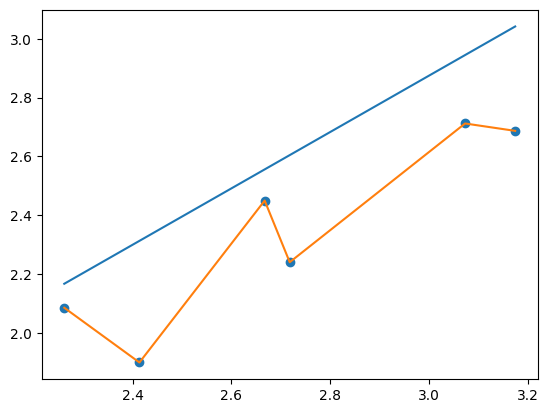

In [ ]:
model.plot(X_test_scaled,y_test_scaled)
plt.scatter(X_test_scaled,y_test_scaled)

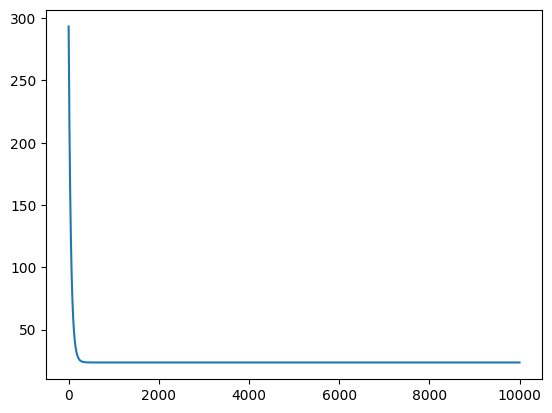

In [ ]:
plt.plot(loss_history)